# Table of Contents

* [Loading and Importing Libraries](#item-30)
* [Introduction](#item-one)
* [Inspiration and Motive](#item-two)
* [Exploratory Data Analysis](#item-3)
    * [Loading and Exploring our Data](#item-4)
    * [Variable Selection](#item-5)
    * [Sub-Genre Selection](#item-6)
    * [Codebook](#item-29) 
    * [Visual EDA](#item-7) 
        * [Correlation Heatmap](#item-8) 
        * [Sub-Genres by Metric](#item-9) 
        * [Classification Distribution](#item-10) 
        * [Missing Data](#item-11) 
    * [Cleaning up Data](#item-12) 
* [Setting up Models](#item-13) 
    * [Splitting the data](#item-14) 
    * [K-fold Validation](#item-15) 
* [Model Building](#item-16) 
    * [Random Forest](#item-17) 
    * [K Nearest Neighbors](#item-18) 
    * [Decision Tree](#item-19) 
    * [Boosted Tree](#item-20) 
* [Results of our Models](#item-21) 
    * [Random Forest Results](#item-22) 
    * [K Nearest Neighbors Results](#item-23) 
    * [Decision Tree Results](#item-24) 
    * [Boosted Tree Results](#item-25) 
* [Testing Random Forest and Boosted Trees](#item-26) 
* [Variable Importance Plots](#item-27) 
* [Conclusion](#item-28)  

<a id="item-30"></a>

# Loading and Importing Libraries

In [86]:


from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
os.chdir('/Users/armaanhirani/Desktop/PSTAT 131/Project/Data')
np.random.seed(69)


<a id="item-one"></a>

# Introduction
EDM stands for "Electronic Dance Music", a genre of music that is created using electronic instruments, such as synthesizers, drum machines, and software-based music production tools. EDM is characterized by its fast and repetitive beats, heavy use of synths and samples, and its emphasis on rhythm and energy. It encompasses a wide range of sub-genres, including house, techno, trance, dubstep, and more. The aim of this project is to build a machine learning model capable of classifying 6 different subgenres of EDM. The data used to train the model is pulled from Kaggle, and I will discuss the various predictors in detail below. I will fit multiple machine learning models to find the one most capable of this task. 

<a id="item-two"></a>

# Inspiration and Motive
I was having a conversation with some of my friends where we were trying to explain what type of EDM music we like, but realized its difficult to narrow down exactly what sub-genres sound like what. This got me thinking that I wish there was an app that would allow you to input an EDM song and it would tell you exactly what category it fell under. Well the first step in creating such an app is to develop a machine learning model capable of categorizing EDM music into different sub-genres. And what better place to create such a model than my machine learning class? So I decided to take a swing at it and see where it gets me. I think it would be cool to deploy this model in some sort of applet to allow for instant characterization of an EDM song sort of like Shazam.


Additionally creating a machine learning model capable of deciphering these features would help me gain a deeper understanding of the nuances between the sub-generes. Over the course of this project I have gotten a deeper understanding of music theory and what exactly makes a song sound a certain way.

<a id="item-3"></a>

# Exploratory Data Analysis
Before we can get to the actual design on the models we must first make sure our data is prepared.

<a id="item-4"></a>

## Loading and Exploring our Data

In [51]:
full_music_data = pd.read_csv('beatport_2021jan.csv')
full_music_data.head()


,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,86-beats_loudness_band_ratio.mean6,87-beats_loudness_band_ratio.stdev1,88-beats_loudness_band_ratio.stdev2,89-beats_loudness_band_ratio.stdev3,90-beats_loudness_band_ratio.stdev4,91-beats_loudness_band_ratio.stdev5,92-beats_loudness_band_ratio.stdev6,genre,artist,track
0,0.079425,0.089604,3.120111,0.214365,0.234222,0.633007,0.012340,0.150022,-23.770716,2.118928,...,0.300503,0.248348,0.131157,0.109375,0.070657,0.027211,0.223204,Afro House,Javi Colors,Feeling Good-Original Mix
1,0.049946,0.066472,3.099221,0.164947,0.217858,0.397340,0.018363,0.079529,-23.910628,2.304411,...,0.009315,0.358702,0.160241,0.164309,0.112424,0.067507,0.021833,Afro House,Notre Dame,Kaneba-Original Mix
2,0.073689,0.072842,3.114776,0.201525,0.239958,0.554679,0.013654,0.116526,-23.883897,2.080150,...,0.049592,0.460217,0.033355,0.317956,0.089679,0.078159,0.078740,Afro House,Lunar Plane,Children Of Rain-Original Mix
3,0.074295,0.143877,3.184615,0.196423,0.231027,0.632171,0.013408,0.098109,-22.323175,2.178740,...,0.017663,0.365594,0.086201,0.221063,0.137246,0.041445,0.028583,Afro House,Bonga,Mona Ki Ngi Xica-Pablo Fierro Remix
4,0.092794,0.061911,3.146484,0.219616,0.250961,0.716576,0.011783,0.162721,-23.549247,2.516020,...,0.013010,0.260539,0.102057,0.098144,0.089875,0.025987,0.031015,Afro House,Yamil,De Todo Se Aprende-Remix


This data was taken from the Kaggle data set, [Electronic Music Features](https://www.kaggle.com/datasets/caparrini/electronic-music-features-201802-beatporttop100). The first 92 columns contain audio features extracted using pyAudioAnalysis and Essentia from two minutes samples of each track provided by Beatport. We'll pare the number of predictors down in the next step. The column `Genre` is the variable we are trying to predict, it contains 32 different sub-genres of EDM.

<a id="item-5"></a>

## Variable Selection
From the 92 predictors that were in the original dataset I pared it down to 16 variables. Many of the columns had similar features just with slightly different statistical measures applied to them. For simplicity, I kept one type of feature each as predictors.

In [52]:
music_data_subset = full_music_data[['1-ZCRm',
 '2-Energym',
 '3-EnergyEntropym',
 '4-SpectralCentroidm',
 '5-SpectralSpreadm',
 '6-SpectralEntropym',
 '7-SpectralFluxm',
 '8-SpectralRolloffm',
 '9-MFCCs1m',
'22-ChromaVector1m',
'68-ChromaDeviationstd',
'69-BPM',
'77-danceability',
'78-beats_loudness.mean',
'80-onset_rate',
'81-beats_loudness_band_ratio.mean1',
'genre']]

Lastly, I cleaned up the column names so they appear better on the plots and are easier to work with.

In [53]:
music_data_subset.columns = ['Zero Crossing Rate', 'Energy', 'Entropy of Energy', 'Spectral Centroid', 'Spectral Spread',
                             'Spectral Entropy', 'Spectral Flux', 'Spectral Rolloff', 'MFCC', 'Chroma Vector',
                             'Chroma Standard Deviation', 'BPM', 
                             'Danceability', 'Beats Loudness', 'Onset Rate', 'Beats Loundness Band Ratio', 'Genre']

<a id="item-6"></a>

## Sub-Genre Selection
Now we need to do something about the number of classes. The dataset categorizes 32 sub-genres of EDM music, many of which are a tier more specific than sub-genre. For our purposes we only need to be able to identify the main categories of EDM. I will group the music into 5 essential sub-genres and an "other" category to catch any music that fall out of these categories. The 5 categories we will be predicting are: `House`, `Bass`, `Dubstep`, `Techno`, `Trance`, `Ambient`, and the `Other` category.

In [54]:
music_data_subset['Genre'].unique()

array(['Afro House', 'Ambient', 'Bass House', 'Big Room', 'Breaks',
       'Dance-Electro Pop', 'Deep House', 'Drum&Bass', 'Dubstep',
       'Electro (Classic-Detroit-Modern)', 'Electro House',
       "Funky-Groove-Jackin' House", 'Future House',
       'Garage-Bassline-Grime', 'Hard Dance-Hardcore', 'Hard Techno',
       'House', 'Indie Dance', 'Leftfield Bass',
       'Leftfield House & Techno', 'Melodic House&Techno',
       'Minimal-Deep Tech', 'Nu Disco-Disco', 'Organic House-Downtempo',
       'Progressive House', 'Psy-Trance', 'Reggae-Dancehall-Dub',
       'Tech House', 'Techno (Peak Time-Driving)',
       'Techno (Raw-Deep-Hypnotic)', 'Trance', 'Trap-Hip-Hop-R&B'],
      dtype=object)

In [55]:
music_data_subset = music_data_subset.replace(['Afro House', "Electro House", 'Deep House',"Funky-Groove-Jackin' House",'Future House', 'Organic House-Downtempo', 'Progressive House', 'Tech House'], 'House')
music_data_subset = music_data_subset.replace(['Techno (Peak Time-Driving)', 'Techno (Raw-Deep-Hypnotic)', 'Hard Techno', 'Hard Dance-Hardcore'], 'Techno')
music_data_subset = music_data_subset.replace(['Trance', 'Psy-Trance'], 'Trance')
music_data_subset =music_data_subset.replace(['Bass House','Garage-Bassline-Grime', 'Drum&Bass', 'Leftfield Bass'], 'Bass')
music_data_subset =music_data_subset.replace(['Leftfield House & Techno', 'Minimal-Deep Tech','Melodic House&Techno'], 'Ambient')
music_data_subset = music_data_subset.replace(['Dance-Electro Pop', 'Nu Disco-Disco', 'Breaks', "Electro (Classic-Detroit-Modern)", "Big Room", "Indie Dance", "Reggae-Dancehall-Dub", "Trap-Hip-Hop-R&B"], "Other")


<a id="item-29"></a>

## Codebook

Now lets take a look at our final predictors.

`Zero Crossing Rate`: The rate of sign-changes of the signal during the duration of a particular frame.  
`Energy`: The sum of squares of the signal values, normalized by the respective frame length.  
`Entropy of Energy`: The entropy of sub-frames’ normalized energies. It can be interpreted as a measure
of abrupt changes.  
`Spectral Centroid`: The center of gravity of the spectrum.  
`Spectral Spread`: The second central moment of the spectrum.  
`Spectral Entropy`: Entropy of the normalized spectral energies for a set of sub-frames.  
`Spectral Flux`: The squared difference between the normalized magnitudes of the spectra of the two
successive frames.  
`Spectral Rolloff`: The frequency below which 90% of the magnitude distribution of the spectrum is
concentrated.  
`MFCCs`: Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.  
`Chroma Vector`: A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).  
`Chroma Standard Deviation`: The standard deviation of the 12 chroma coefficients.  
`BPM`: The beats per minute of the song.   
`Danceability`: Measures how suitable a particular song is for dancing. It is based on factors such as tempo, rhythm, beat strength, and overall energy level.  
`Beats Loudness`: Spectral energy computed on beats segments of audio across the whole spectrum, and ratios of energy in 6 frequency bands.  
`Onset Rate`: Number of detected onsets per second.  
`Beats Loudness Band Ratio`: Spectral energy computed on beats segments of audio across the whole spectrum, and ratios of energy in 6 frequency bands.

Luckily all of our predictors are numerical so we can create a correlation heatmap of all our variables to get a sense of their relationships and take note of anything out of the ordinary.

In [56]:
music_data_subset.dtypes

Zero Crossing Rate            float64
Energy                        float64
Entropy of Energy             float64
Spectral Centroid             float64
Spectral Spread               float64
Spectral Entropy              float64
Spectral Flux                 float64
Spectral Rolloff              float64
MFCC                          float64
Chroma Vector                 float64
Chroma Standard Deviation     float64
BPM                           float64
Danceability                  float64
Beats Loudness                float64
Onset Rate                    float64
Beats Loundness Band Ratio    float64
Genre                          object
dtype: object

<a id="item-7"></a>

## Visual EDA

<a id="item-8"></a>

#### Correlation Heatmap

<AxesSubplot:title={'center':'Correlation Heatmap'}>

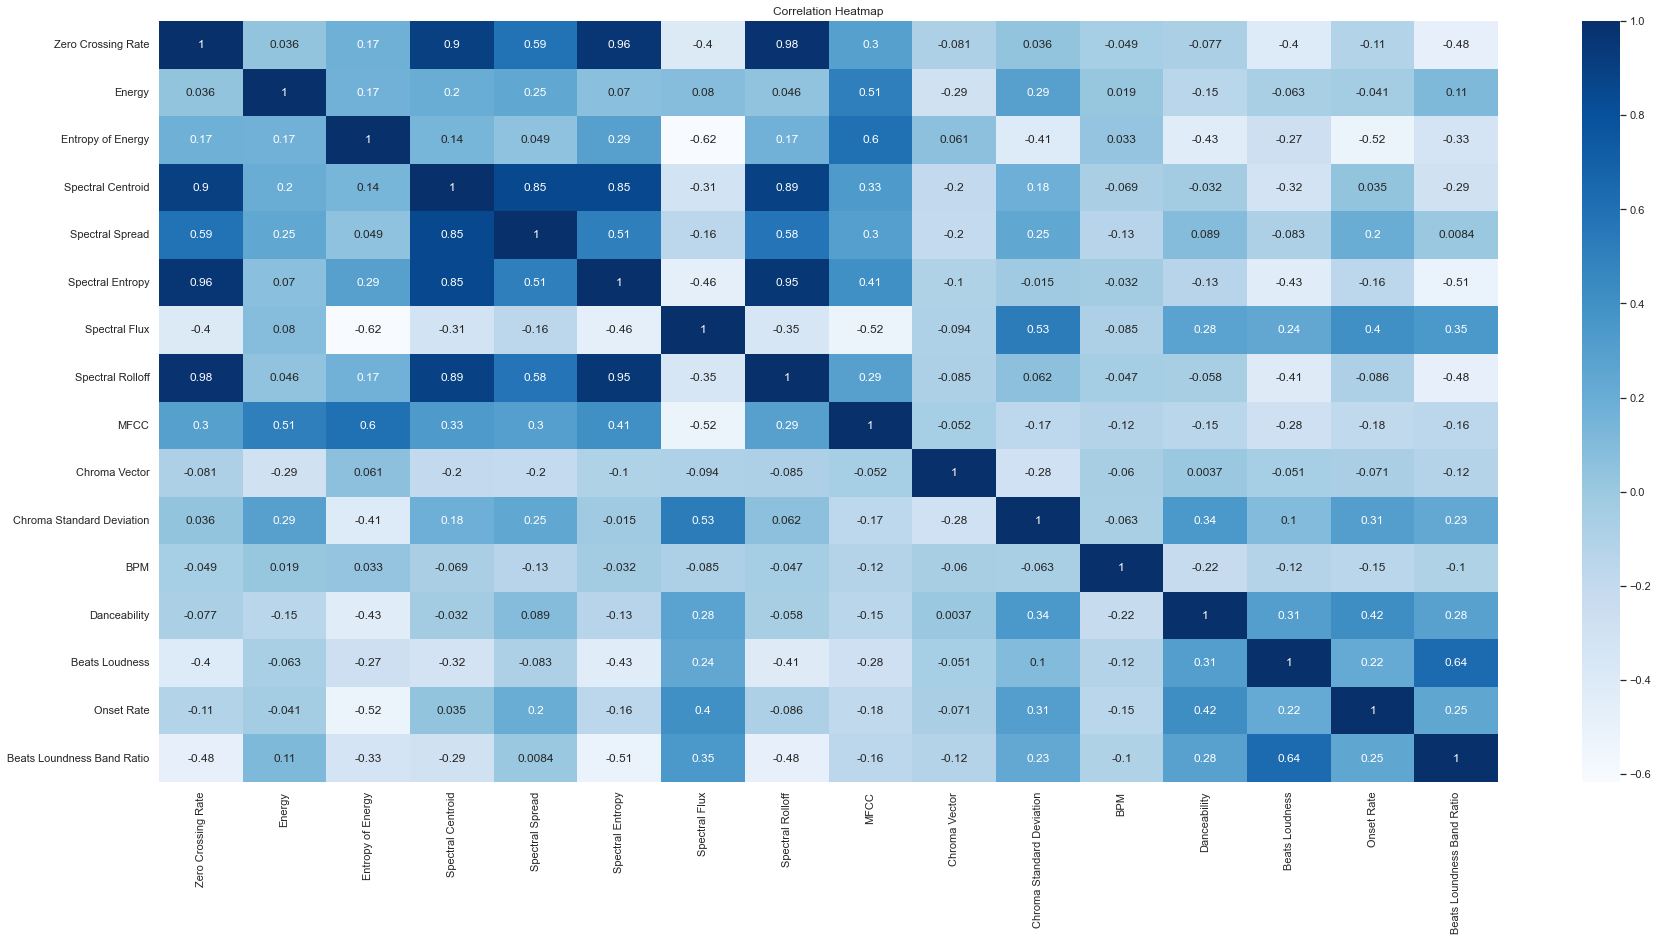

In [57]:
plt.figure(figsize=(30,14))
plt.title("Correlation Heatmap")
sns.heatmap(music_data_subset.corr(),annot=True,cmap='Blues')


Not surprisingly some of our predictors have high correlation. It makes sense that the predictors based around the power spectrum (`Spectral Centroid`, `Spectral Spread`, `Spectral Entropy`, `Spectral Flux`, and `Spectral Rolloff`) have high correlations with one another. One interesting raltionship that I wasn't expecting is between `Zero Crossing Rate` and `Spectral Rolloff`. However, since EDM songs often feature a consistent and fast-paced beat they often have a high ZCR value. Additionally, EDM songs may have a specific range of frequencies that dominate the overall sound, resulting in a predictable and well-defined spectral rolloff. So it makes sense that they have such a strong positive correlation.

<a id="item-9"></a>
#### Sub-Genres by Metric

Next we can look at how some predictors are affecting the classes differently. The following plots show what I think the most important variables are and the distribution of their measurements for each sub-genre.

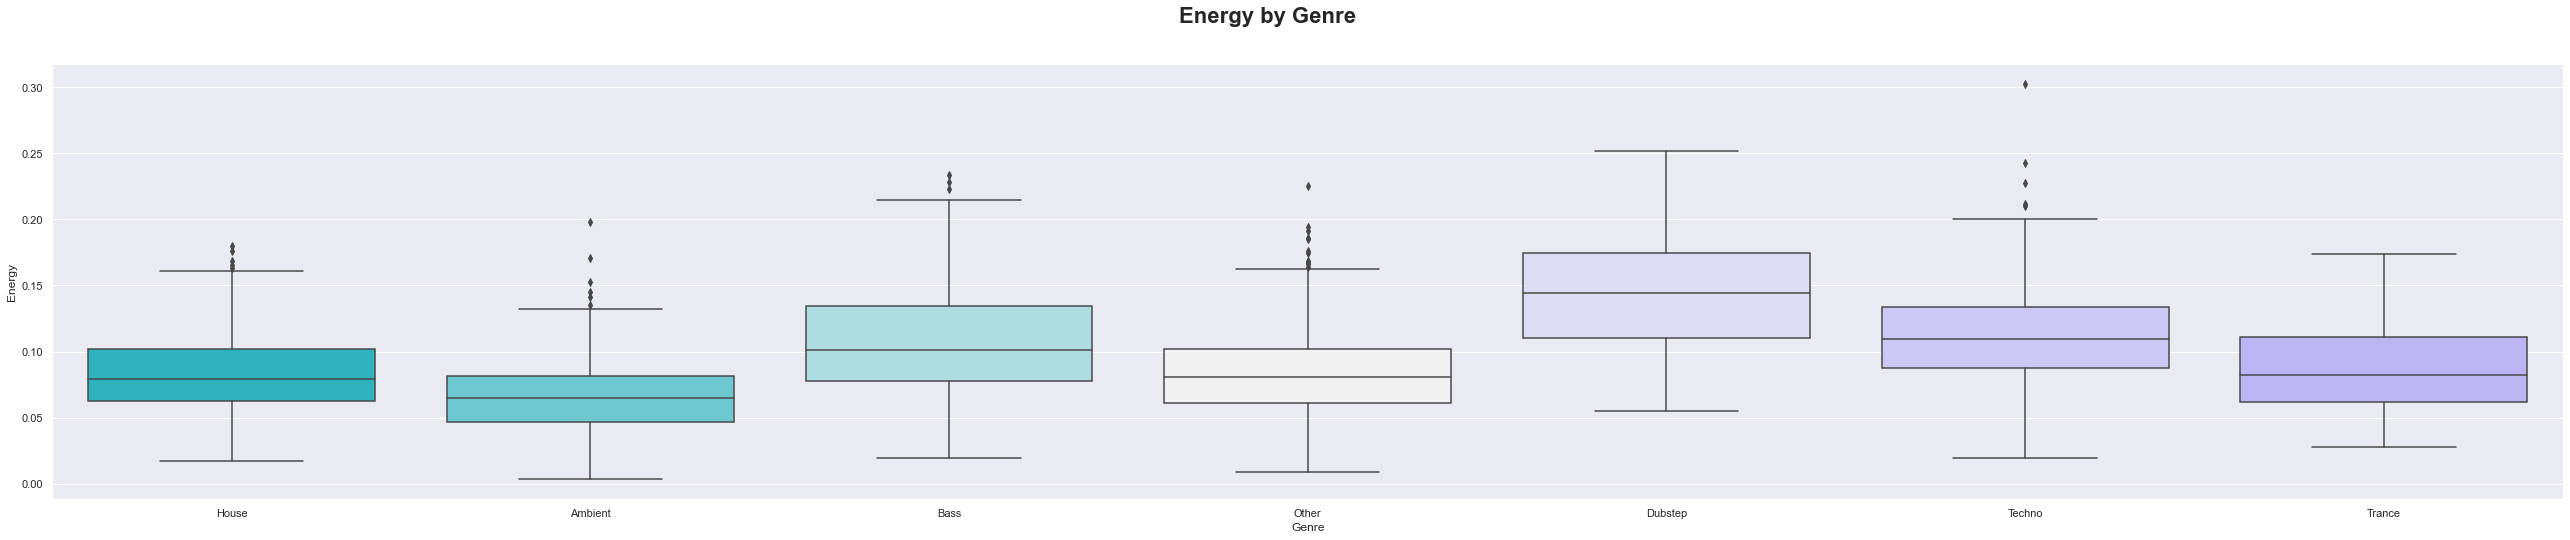

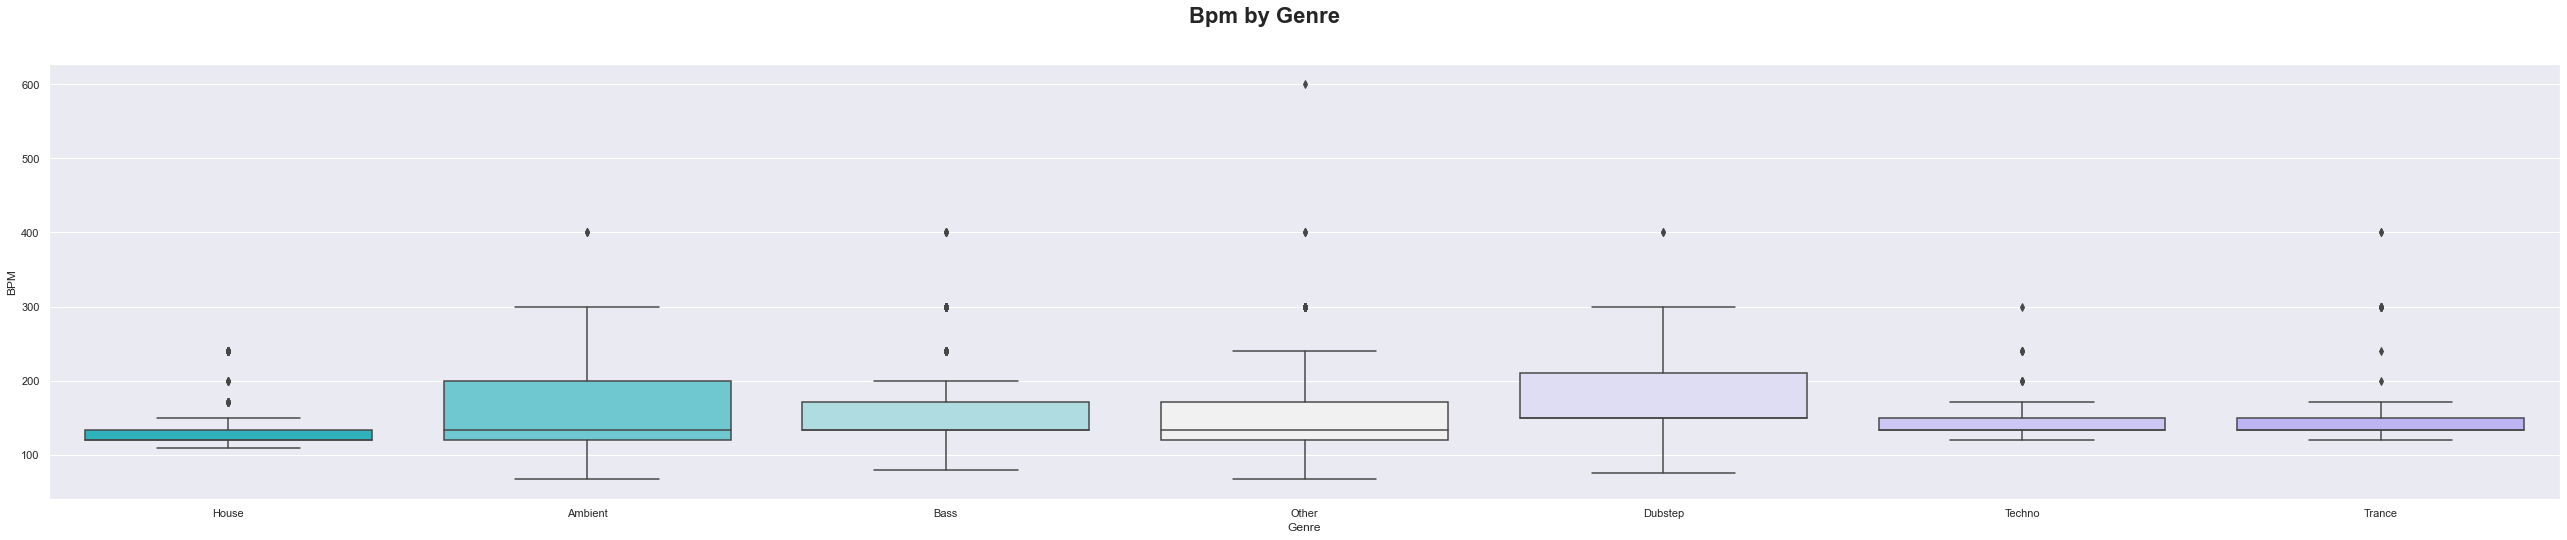

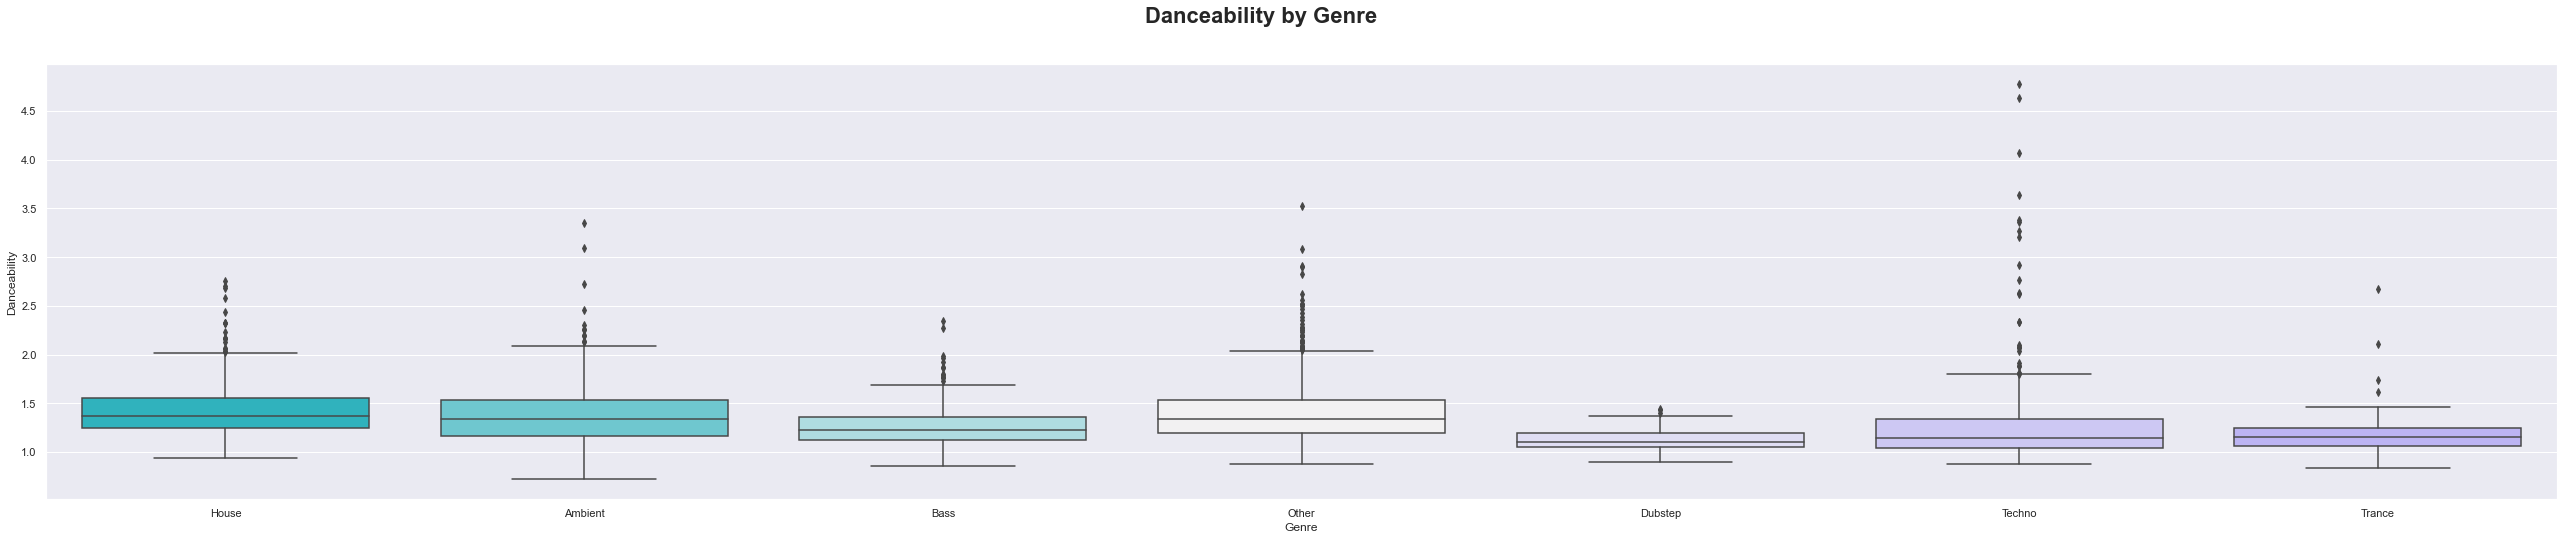

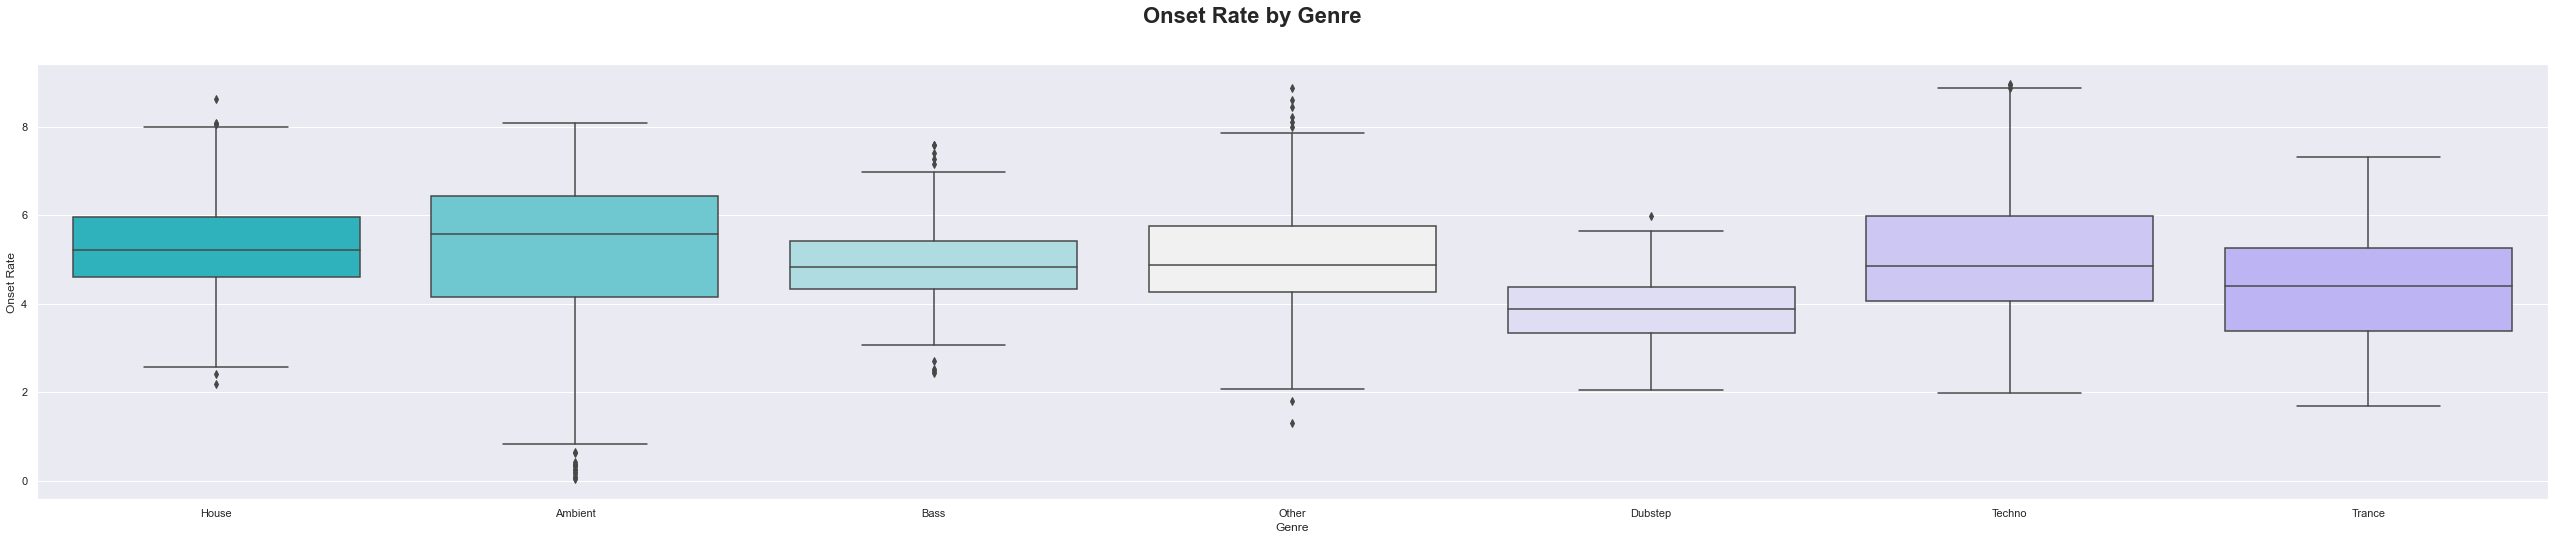

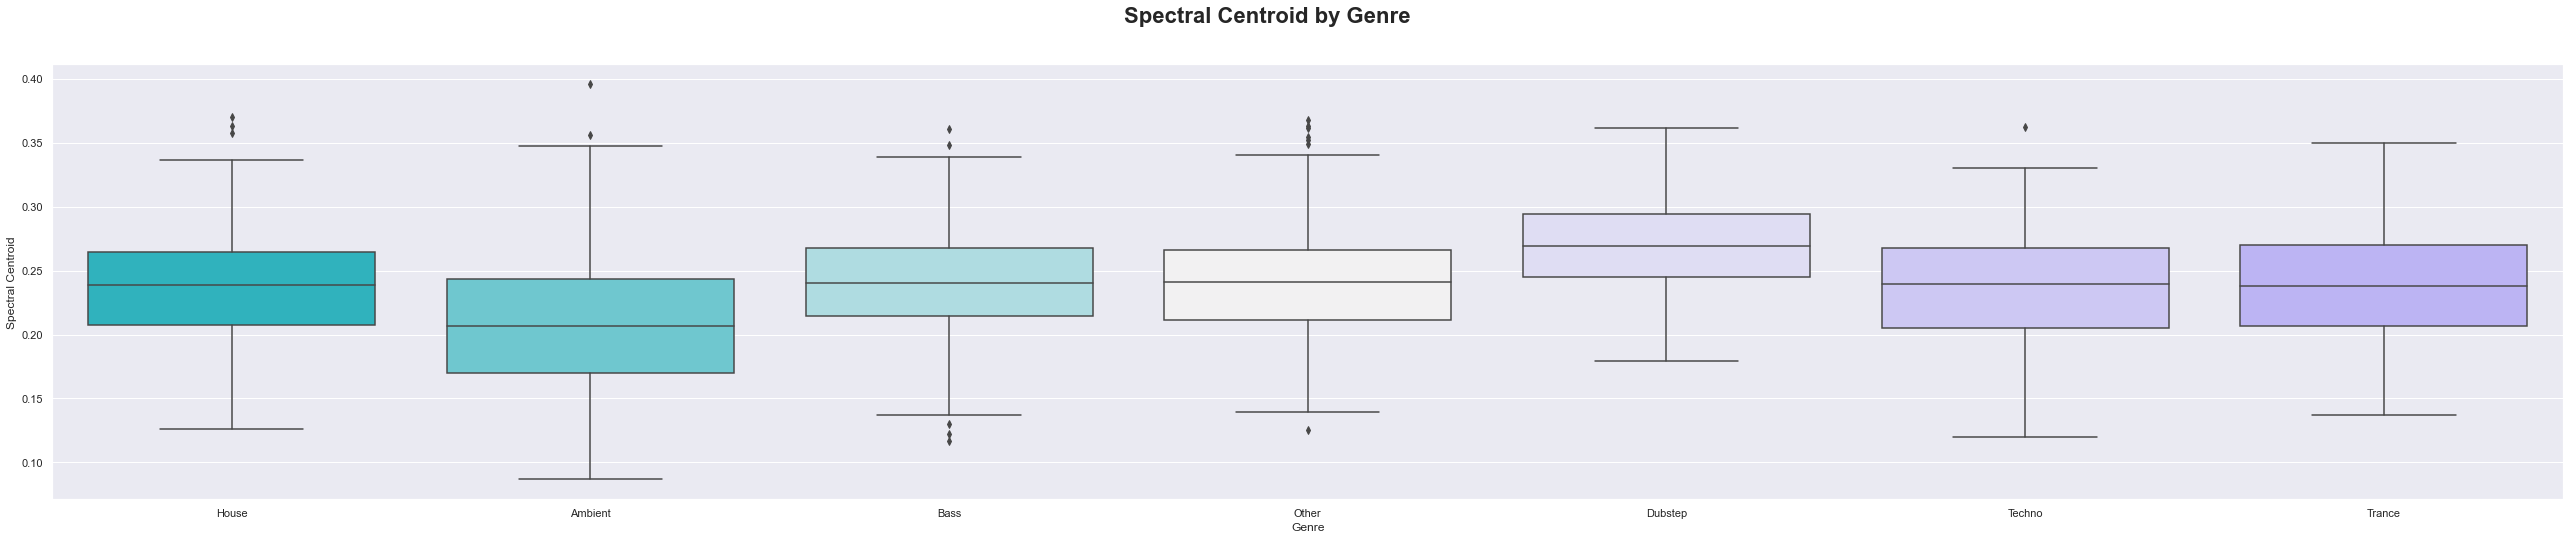

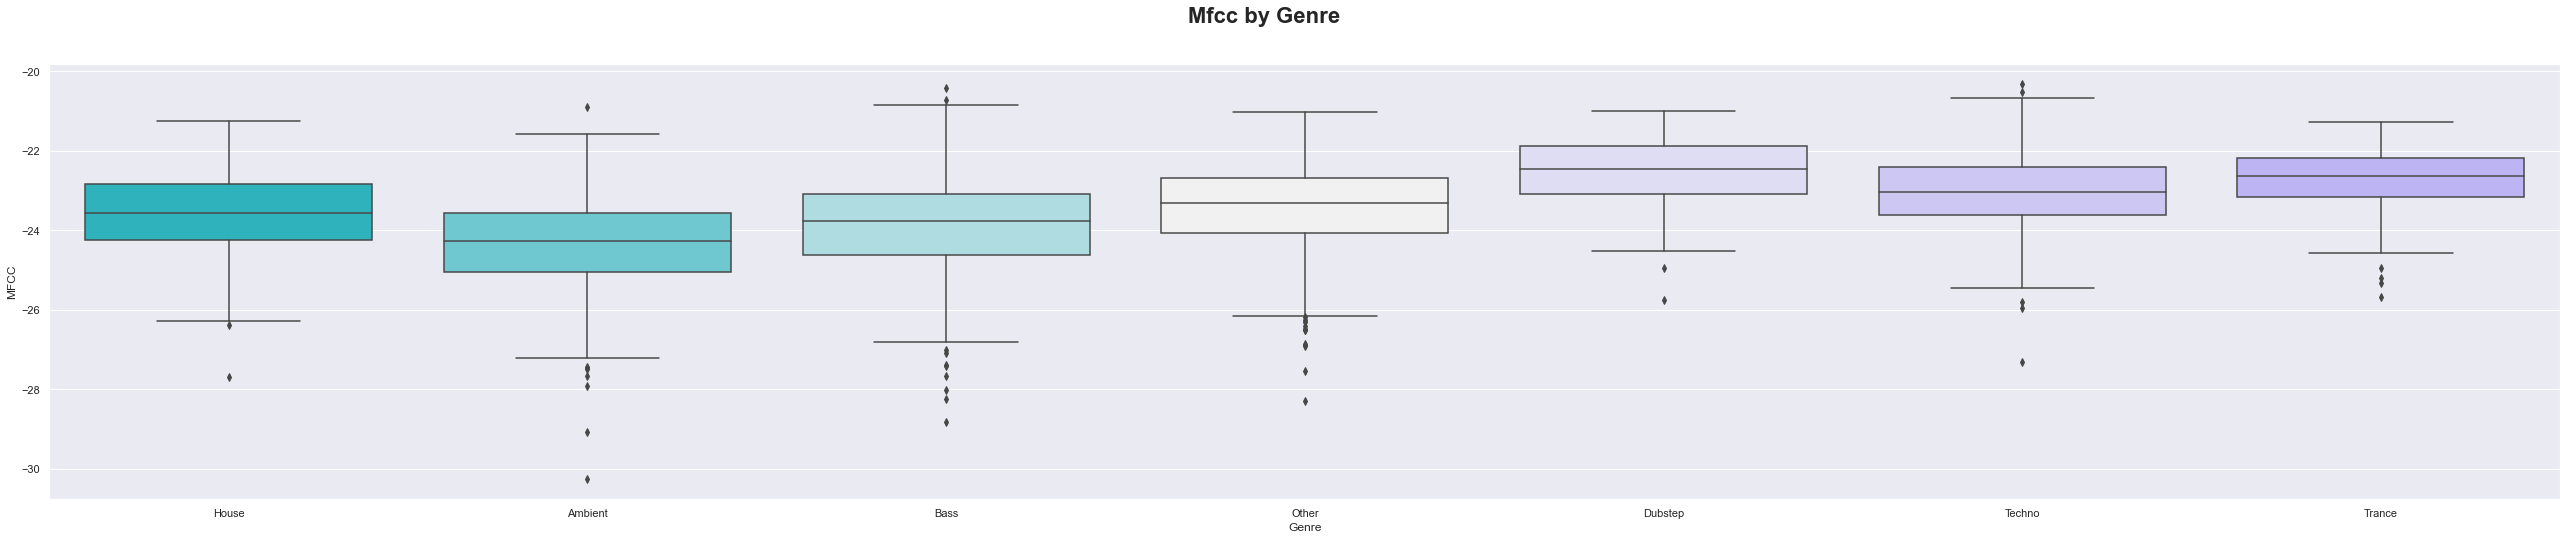

In [58]:

audio_metrics = ['Energy', 'BPM', 'Danceability', 'Onset Rate', 'Spectral Centroid', 'MFCC']

for metric in audio_metrics:
    fig = plt.figure(figsize=[45,8])
    fig.suptitle(metric.replace('_', ' ').title() + ' by Genre', fontweight='bold', fontsize=22)
    fig.patch.set_alpha(0)
    ax = sns.boxplot(x='Genre', y=metric, data=music_data_subset, palette=sns.diverging_palette(205, 270, s=98, l=73, n=7), showfliers=True)
    plt.show(); 


I found the results of some of these plots surprising. I thought `BPM` would be one of the most distinctive metrics to differentiate between classes, but it looks as though they are all quite similar. It seems as though `Energy` and `MFCC` will be among the most helpful predictors for our classification model. 

<a id="item-10"></a>

#### Classification Distribution

Lets also look at the distribution of our `Genre` variable

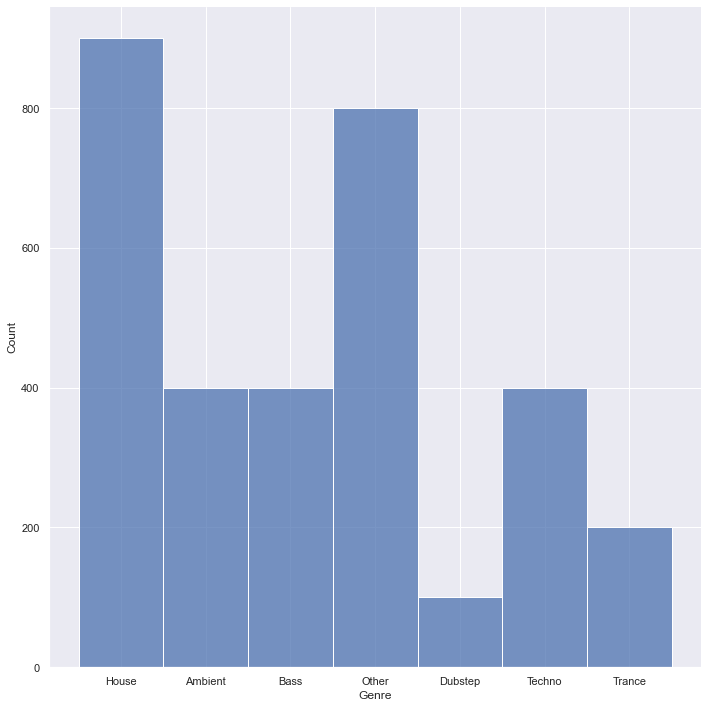

In [59]:
sns.set(font_scale = 1)
sns.displot(music_data_subset, x="Genre", height=10, aspect=1)


The distribution of sub-genres is skewed towards **House** and our **Other** category, with **Dubstep** having the fewest number of observations in the dataset. This is a prime example of why stratifying when we split our dataset will be so important. 

<a id="item-11"></a>

#### Missing Data

Missing data can be a problem when trainining our models. Lets check to see if we have any missing values, and if we do whether they are missing at random.

<AxesSubplot:title={'center':'Missing Data Heatmap'}>

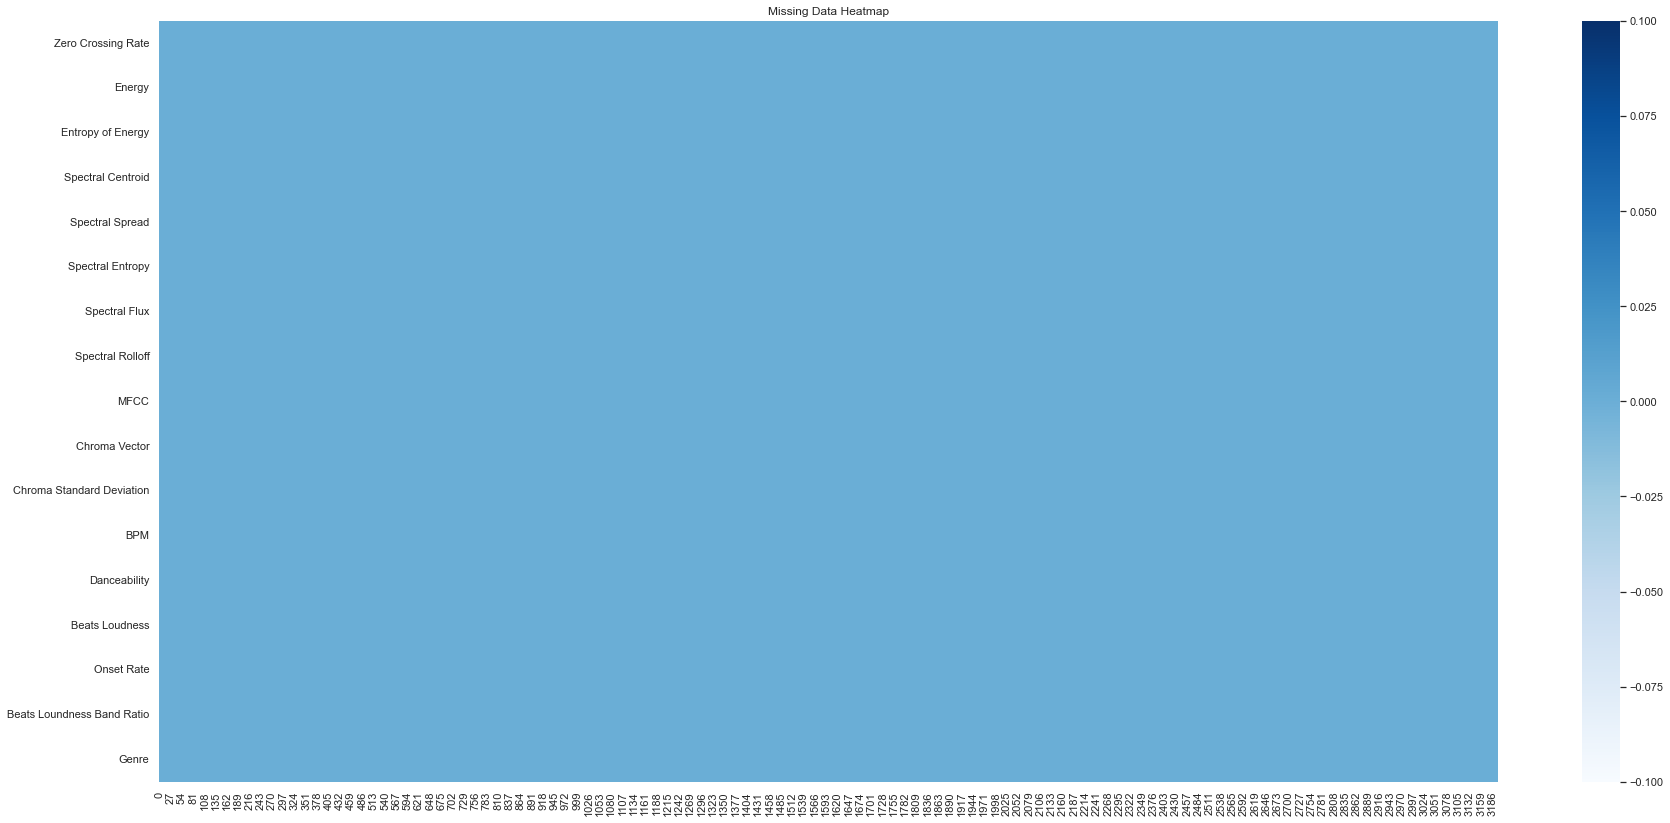

In [77]:
plt.figure(figsize=(30,14))
missing_plot = plt.axes()
missing_plot.set_title('Missing Data Heatmap')
sns.heatmap(music_data_subset.isna().transpose(), cmap='Blues'
            )


Great! We have no missing values to worry about, thank you **BVITOS** on Kaggle for organizing such a great dataset!

<a id="item-12"></a>

## Cleaning up Data

Now that we have chosen our predictors and made sure we don't have any missing values to worry about we can normalize our numerical data and encode our character variable. Normalizing our data will help ensure that the features are on similar scales and that the algorithm does not overweigh one feature over another.

In [61]:

# Separate features from target
X = music_data_subset.iloc[:, :16]
y = music_data_subset.iloc[:, -1]

# Normalize the features using 
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Encode the target column  
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Combine the normalized features and encoded target
normalized_data = pd.concat([X_normalized, pd.Series(y_encoded, name=y.name)], axis=1)

normalized_data.head()


,Zero Crossing Rate,Energy,Entropy of Energy,Spectral Centroid,Spectral Spread,Spectral Entropy,Spectral Flux,Spectral Rolloff,MFCC,Chroma Vector,Chroma Standard Deviation,BPM,Danceability,Beats Loudness,Onset Rate,Beats Loundness Band Ratio,Genre
0,-0.695212,-0.004024,0.196611,-0.470019,-0.429620,-0.742116,0.134622,-0.452843,-0.215220,-0.290445,0.313964,-0.629474,0.252577,-0.850154,0.251769,-0.237581,3
1,-1.528967,-0.631970,-0.090560,-1.582876,-1.148673,-1.480463,1.268084,-1.369235,-0.338116,-1.001729,-0.153169,-0.629474,0.110235,2.212483,1.484678,1.007724,3
2,-0.857454,-0.459046,0.123280,-0.759176,-0.177548,-0.987520,0.381978,-0.888280,-0.314636,-0.208383,0.805232,-0.629474,0.000155,0.988771,0.198979,0.040129,3
3,-0.840321,1.469314,1.083339,-0.874056,-0.570005,-0.744735,0.335610,-1.127700,1.056270,0.502636,0.737266,-0.629474,-0.616411,0.081404,0.324356,0.296271,3
4,-0.317101,-0.755772,0.559168,-0.351774,0.305920,-0.480297,0.029951,-0.287751,-0.020687,1.440332,-0.178721,-0.629474,0.417566,0.773524,1.801356,1.459298,3


<a id="item-13"></a>
# Setting up Models

Now that we have explored and prepared our data, we are ready to begin preparing the machine learning algorithms. We will be splitting our data into train and test datasets, preparing our folds for cross-validation, and setting up our models with the proper hyperparameters.

<a id="item-14"></a>

### Splitting the data

We are splitting our data into a training set and a testing set stratifying on the `Genre` column. We separate the data that we train our model on from the data we use to test it so we can get an accurate measure of how our model does on fresh unseen data. We stratify the split so that we have an even distribution of the different sub-genres across our train and test dataset.

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.3, stratify = normalized_data['Genre'])

<a id="item-15"></a>

### K-fold Validation

Next we setup our K-fold validation folds. The K-fold cross validation allows us to use all our train data for the model, rather than have to split it for validation. It does this by splitting data into K-number folds (10 in our case) and using the folds for both training and validation.

In [63]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

<a id="item-16"></a>

# Model Building

Finally we are ready to build and train our models. While Python doesn't have the same workflow and recipe steps as R, the general concept is similar. The four algorithms we will be trying are the Random Forest, K Nearest Neighbor, Decision Tree, and Boosted Tree models.

Each model is created using the same steps. We initialize the algorithm, build our tuning grid, train on our folded data, and choose the best model. We are using the scikit-learn Python library for all the algorithms. 

<a id="item-17"></a>

### Random Forest

Random forest is an ensemble learning method that constructs a decision trees and then combines them to make a prediction. Each tree is grown using a random subset of the features and a random subset of the training samples, which helps to reduce overfitting and improve generalization performance. We will tune the following hyperparameters:

`max_features`: The maximum number of features to consider when splitting a node. 
`n_estimators`: The number of trees in the forest. 
`min_samples_split`: The minimum number of samples required to split an internal node.

In [64]:
# Define model
random_forest_model = RandomForestClassifier()

# Define hyperparameters to be tuned
forest_grid = {
    "max_features": (2, 3, 4, 5),
    "n_estimators": (20, 30, 40),
    "min_samples_split": (15, 20, 25, 30)
}
# Define grid search with cross-validation
forest_grid_search = GridSearchCV(random_forest_model, param_grid=forest_grid, cv=kfold)

# Train model with grid search
forest_grid_search.fit(x_train, y_train)

forest_final = forest_grid_search.best_estimator_

print("Best hyperparameters: ", forest_grid_search.best_params_)

Best hyperparameters:  {'max_features': 5, 'min_samples_split': 25, 'n_estimators': 30}


<a id="item-18"></a>

### K Nearest Neighbors

K-nearest neighbors is another type of algorithm that makes predictions based on the "closeness" of data points. It looks at the k-nearest points to a given data point and uses their labels to make a prediction. We will tune the following hyperparameter:

`n_neighbors`: The number of nearest neighbors to consider when making a prediction.

In [65]:
knn_model = KNeighborsClassifier()

knn_grid = {'n_neighbors' : range(1,50)}

knn_grid_search = GridSearchCV(knn_model, param_grid=knn_grid, cv=kfold)

knn_grid_search.fit(x_train, y_train)

print("Best hyperparameters: ", knn_grid_search.best_params_)

Best hyperparameters:  {'n_neighbors': 32}


<a id="item-19"></a>

### Decision Tree

A decision tree is a type of algorithm that makes predictions by following a tree-like structure of decisions. Each internal node of the tree represents a decision based on a specific feature of the data, and each leaf node represents a prediction. We will tune the following hyperparameters:

`criterion` = Determines the metric that the algorithm uses to determine which feature to split on at each internal node of the tree.
`max_depth`: The maximum depth of the decision tree. This limits the number of levels in the tree and helps to prevent overfitting.
`min_samples_split`: The minimum number of samples required to split an internal node.
`min_samples_leaf`: The minimum number of samples required to be at a leaf node. 


In [66]:
tree_model = DecisionTreeClassifier()

tree_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5]}

tree_grid_search=GridSearchCV(tree_model, param_grid=tree_grid, cv=kfold)
tree_grid_search.fit(x_train, y_train)

decision_final = tree_grid_search.best_estimator_
print("Best hyperparameters: ", tree_grid_search.best_params_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 15}


<a id="item-20"></a>

### Boosted Tree

Boosted trees are a type of ensemble learning method that combines many  decision trees into a single model. The algorithm works by iteratively training new trees to correct the errors of the previous ones, with each tree giving more weight to the misclassified instances. We will tune the following hyperparameters:

`n_estimators`: The number of trees to include in the model. This is a tuning parameter that controls the complexity of the model and the amount of boosting.
`learning_rate`: The shrinkage parameter that controls the contribution of each tree to the final model. Smaller values of learning_rate will result in a more conservative boosting and a smaller effect of each tree.
`max_depth`: The maximum depth of each tree. This limits the size of the trees and helps to prevent overfitting.

In [67]:
boosted_model = GradientBoostingClassifier()

boosted_grid = {
    'n_estimators': [10, 20, 30, 40],
    'learning_rate': [0.1, 0.01, .001],
    'max_depth': [3, 4, 5]
}

boosted_grid_search=GridSearchCV(boosted_model, param_grid=boosted_grid, cv=kfold)
boosted_grid_search.fit(x_train, y_train)

print("Best hyperparameters: ", boosted_grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 40}


<a id="item-21"></a>

## Results of our Models

After finally building and training all our models, it is time to compare them and choose the best model for classifiying EDM subgenres. First we select the optimal hyperparameters for each of the four models, then fit them back onto the train data and collect metrics. We will be looking at three metrics for each model: Accuracy, ROC curve using the OvR macro-average, and the confusion matrix. 

<a id="item-22"></a>

### Random Forest Results

<AxesSubplot:>

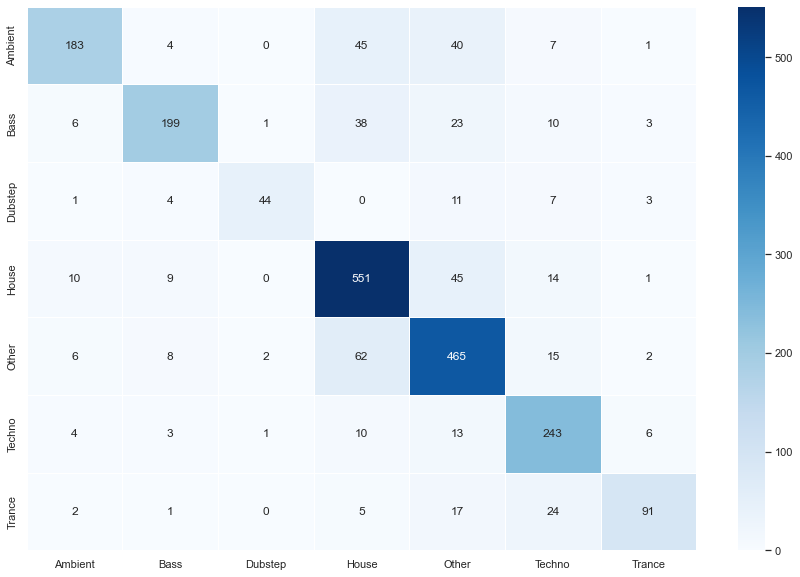

In [68]:
forest_final = forest_grid_search.best_estimator_


forest_accuracy = accuracy_score(y_train, forest_final.predict(x_train)) * 100

y_score_forest = forest_final.predict_proba(x_train)

forest_roc = roc_auc_score(
    y_train,
    y_score_forest,
    multi_class="ovr",
    average="macro",
)

forest_cf_matrix = confusion_matrix(y_train, forest_final.predict(x_train))
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(forest_cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g', cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)

This Confusion Matrix looks great. The model was best at predicting the **House** and **Other** categories, but these are also our two biggest classes.

<a id="item-23"></a>

### K Nearest Neighbors Results

<AxesSubplot:>

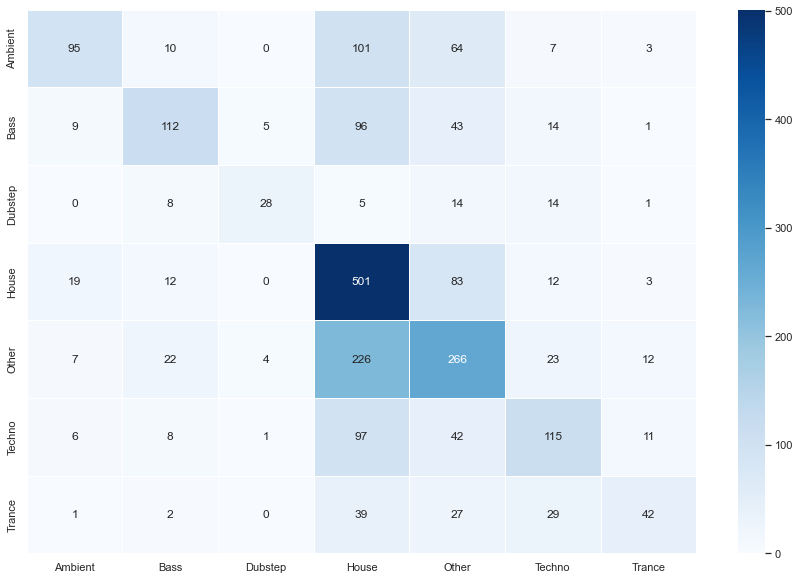

In [69]:
knn_final = knn_grid_search.best_estimator_


knn_accuracy = accuracy_score(y_train, knn_final.predict(x_train)) * 100

y_score_knn = knn_final.predict_proba(x_train)

knn_roc = roc_auc_score(
    y_train,
    y_score_knn,
    multi_class="ovr",
    average="macro",
)

knn_cf_matrix = confusion_matrix(y_train, knn_final.predict(x_train))
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(knn_cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g', cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)

The K Nearest Neighbor model didn't do too well on the training data, but this was expected as these models typically don't do very well when there are multiple classes.

<a id="item-24"></a>

### Decision Tree Results

<AxesSubplot:>

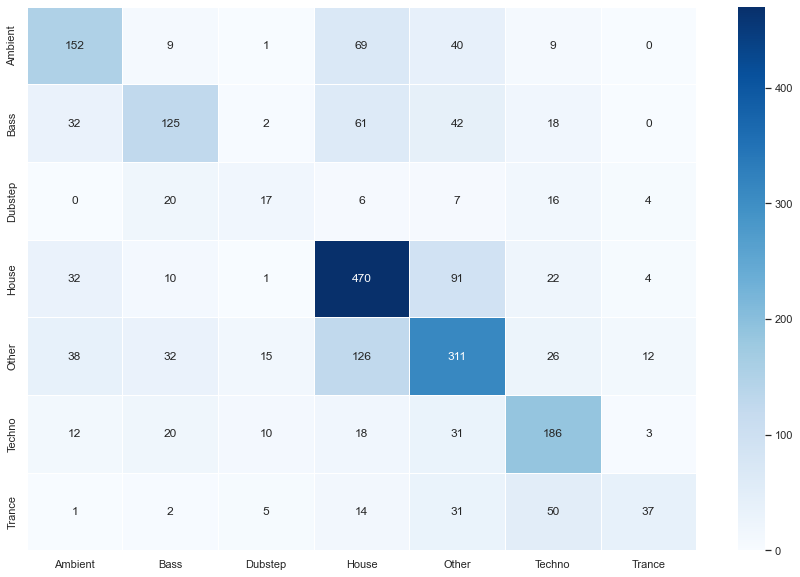

In [70]:
decision_final = tree_grid_search.best_estimator_


decision_accuracy = accuracy_score(y_train, decision_final.predict(x_train)) * 100

y_score_decision= decision_final.predict_proba(x_train)

decision_roc = roc_auc_score(
    y_train,
    y_score_decision,
    multi_class="ovr",
    average="macro",
)

decision_cf_matrix = confusion_matrix(y_train, decision_final.predict(x_train))
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(decision_cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g', cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)

The Decision Tree model did better than K Nearest Neighbors, but it is not nearly as good as Random Forest, especially when it comes to the **Other** category.

<a id="item-25"></a>

### Boosted Tree Results

<AxesSubplot:>

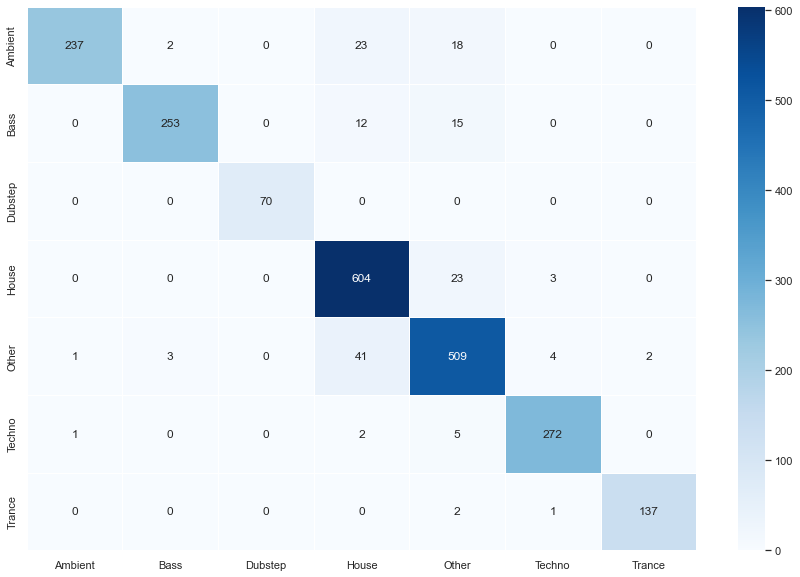

In [71]:
boosted_final = boosted_grid_search.best_estimator_


boosted_accuracy = accuracy_score(y_train, boosted_final.predict(x_train)) * 100

y_score_boosted = boosted_final.predict_proba(x_train)

boosted_roc = roc_auc_score(
    y_train,
    y_score_boosted,
    multi_class="ovr",
    average="macro",
)

boosted_cf_matrix = confusion_matrix(y_train, boosted_final.predict(x_train))
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(boosted_cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g', cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)

The Boosted Tree model appears to have done the best on the training data, classifying nearly every sub-genre accurately. It is especially impressive that it didn't misclassify a single **Dubstep** song.

In [72]:
final_results = pd.DataFrame(
    {"Models":["Random Forest", 'K Nearest Neighbor', "Decision Tree", "Boosted Tree"],
     "Average ROC_AUC" :[forest_roc, knn_roc, decision_roc, boosted_roc],
     "Accuracy" : [forest_accuracy, knn_accuracy, decision_accuracy, boosted_accuracy]}
)

final_results



,Models,Average ROC_AUC,Accuracy
0,Random Forest,0.975615,79.285714
1,K Nearest Neighbor,0.873592,51.741071
2,Decision Tree,0.870386,57.946429
3,Boosted Tree,0.995988,92.946429


As we can see the Random Forest and Boosted Tree models performed the best. The Random Forest Model had an Average ROC_AUC of 0.98 and an Accuracy of 79.28% and the Boosted Tree model had .99 Average ROC_AUC and 92.95% Accuracy. Since both of these models were so close in performance I will fit them both to the testing data and see how they do.

<a id="item-26"></a>

# Testing Random Forest and Boosted Trees

In [73]:
forest_accuracy_test = accuracy_score(y_test, forest_final.predict(x_test)) * 100

y_score_forest_test = forest_final.predict_proba(x_test)

forest_roc_test = roc_auc_score(
    y_test,
    y_score_forest_test,
    multi_class="ovr",
    average="macro",
)

In [74]:
boosted_accuracy_test = accuracy_score(y_test, boosted_final.predict(x_test)) * 100

y_score_boosted_test = boosted_final.predict_proba(x_test)

boosted_roc_test = roc_auc_score(
    y_test,
    y_score_boosted_test,
    multi_class="ovr",
    average="macro",
)

In [75]:
final_results_test = pd.DataFrame(
    {"Models":["Random Forest", "Boosted Tree"],
     "Average ROC_AUC" :[forest_roc_test, boosted_roc_test],
     "Accuracy" : [forest_accuracy_test, boosted_accuracy_test]}
)

final_results_test

,Models,Average ROC_AUC,Accuracy
0,Random Forest,0.869976,56.666667
1,Boosted Tree,0.869420,55.833333


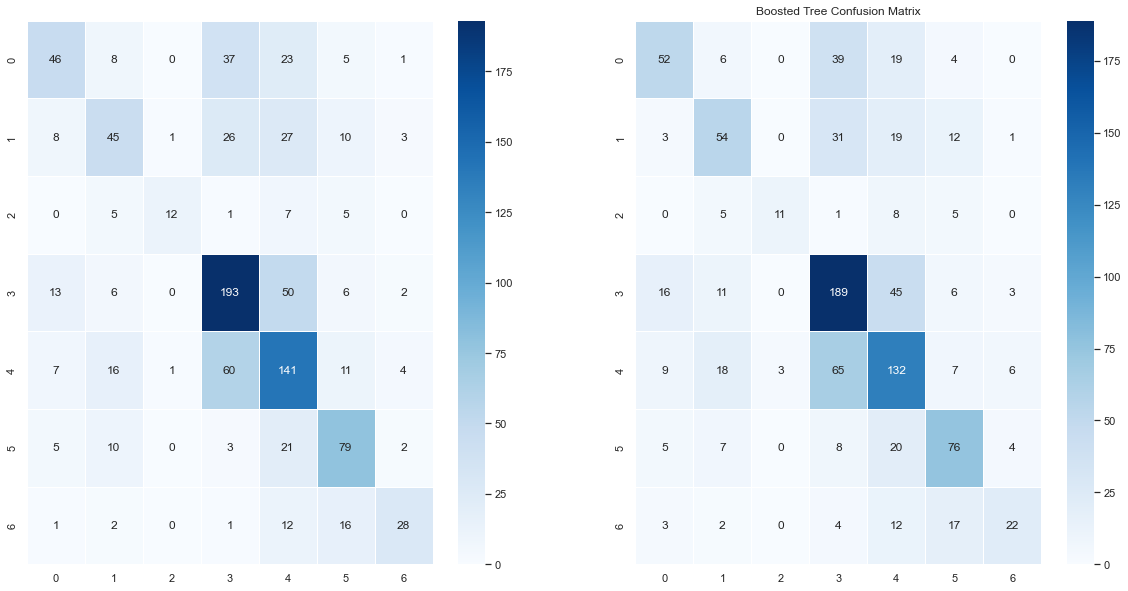

In [76]:
plt.rcParams["figure.figsize"] = [20, 10]
f, axes = plt.subplots(1, 2)
boosted_cf_matrix_test = confusion_matrix(y_test, boosted_final.predict(x_test))
forest_cf_matrix_test = confusion_matrix(y_test, forest_final.predict(x_test))

plt.title('Random Forest Confusion Matrix')
sns.heatmap(forest_cf_matrix_test, linewidths=1, annot=True, ax=axes[0], fmt='g', cmap='Blues')
plt.title('Boosted Tree Confusion Matrix')
sns.heatmap(boosted_cf_matrix_test, linewidths=1, annot=True, ax=axes[1], fmt='g', cmap='Blues')
plt.show()

As we can see our Random Forest and Boosted Tree models both performed very similarly on the test data. Unfortunately they both performed worse than on the training dataset with an ROC_AUC of 0.87 for both the Random Forest and Boosted Tree models, as well as an Accuracy of 56.67% for Random Forest and 55.83% for the Boosted Tree.

<a id="item-27"></a>

## Variable Importance Plots

For fun lets take a look at the Variable Importance Plots and see if my original predictions were correct. 

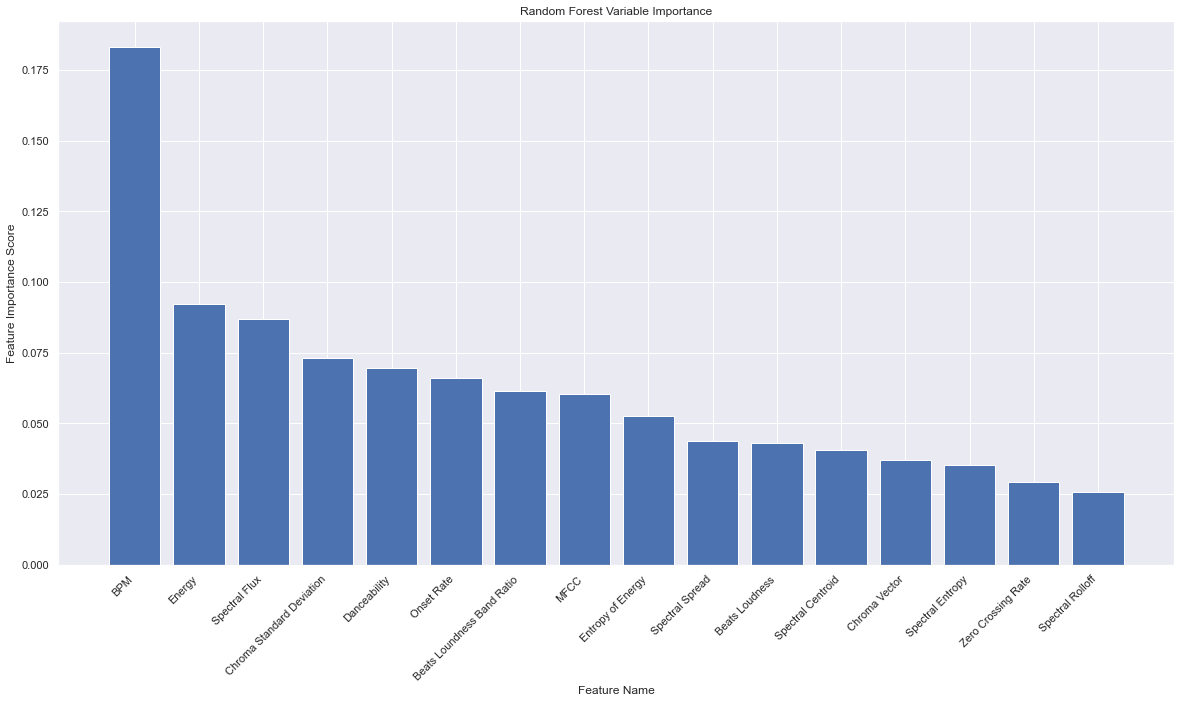

In [84]:
importances = forest_final.feature_importances_

feature_names = ['Zero Crossing Rate', 'Energy', 'Entropy of Energy', 'Spectral Centroid', 'Spectral Spread',
                             'Spectral Entropy', 'Spectral Flux', 'Spectral Rolloff', 'MFCC', 'Chroma Vector',
                             'Chroma Standard Deviation', 'BPM', 
                             'Danceability', 'Beats Loudness', 'Onset Rate', 'Beats Loundness Band Ratio']

# Sort the feature importances in descending order
sorted_idx = importances.argsort()[::-1]

# Update the feature names based on the sorted indices
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Create a bar plot of the feature importances
plt.bar(range(X.shape[1]), importances[sorted_idx])
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance Score')
plt.title('Random Forest Variable Importance Chart')
plt.show()

My original predictions were not quite correct. `BPM` ended up being the most important predictor, but as I expected `Energy` was one of the most important variables for the model.

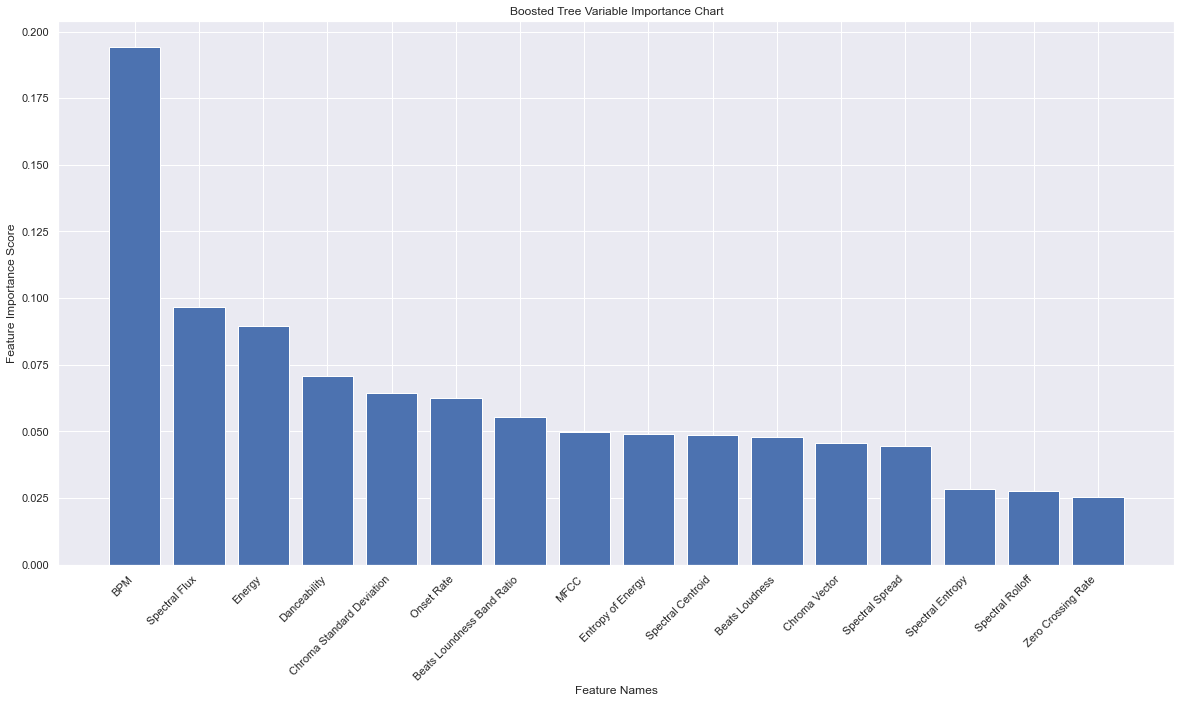

In [85]:
importances_boosted = boosted_final.feature_importances_

feature_names = ['Zero Crossing Rate', 'Energy', 'Entropy of Energy', 'Spectral Centroid', 'Spectral Spread',
                             'Spectral Entropy', 'Spectral Flux', 'Spectral Rolloff', 'MFCC', 'Chroma Vector',
                             'Chroma Standard Deviation', 'BPM', 
                             'Danceability', 'Beats Loudness', 'Onset Rate', 'Beats Loundness Band Ratio']

# Sort the feature importances in descending order
sorted_idx = importances_boosted.argsort()[::-1]

# Update the feature names based on the sorted indices
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Create a bar plot of the feature importances
plt.bar(range(X.shape[1]), importances_boosted[sorted_idx])
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=45, ha='right')
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance Score')
plt.title('Boosted Tree Variable Importance Chart')
plt.show()

The Boosted Tree model had similar variables importances. Again `BPM` was the most important predictor for the model, as well as `Spectral Flux` and `Energy`. `Zero Crossing Rate` and `Spectral Rolloff` were once again the least important predictors.

<a id="item-28"></a>

# Conclusion

Based on the results of our EDM sub-genre classification project, I found that the random forest and boosted tree models performed the best in terms of accuracy. However, both models showed a significant drop in performance on the testing data, indicating the presence of overfitting. I tried to address this issue by reducing the number of classes, as well as adjusting the hyperparameters for the models. But this could mean that this dataset contains too much noise to properly classify the music. This makes sense because even I as a human have trouble differentiating between sub-genres of EDM music. While doing research for this project I realized that most EDM songs don't fall into a specific category, they all blend sub-genres together. If I was to build on this project the first step I would take is to gather more data. That is the one step for fixing overfitting that I was unable to do for this project. The next step would be to potentially extract more features. In other music genre classification problems I have seen, they use images of the music wavelengths as a feature, which could make the model more accurate.

In conclusion, while our EDM sub-genre classification project showed promising results using random forest and boosted tree models, it also revealed the challenge of accurately classifying EDM sub-genres due to the inherent overlap and blending of different styles. With more data and advanced techniques, I believe that machine learning can be a powerful tool for EDM sub-genre classification and could have practical applications in music recommendation systems and automated music tagging.